# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [20]:
pd.read_csv('D:/DS foundattion class/Assignment/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Apple Stock files/appl_1980_2014.csv',sep=',')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [21]:
apple=pd.read_csv('D:/DS foundattion class/Assignment/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Apple Stock files/appl_1980_2014.csv',sep=',')

### Step 4.  Check out the type of the columns

In [22]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [23]:
apple['Date']= pd.to_datetime(apple['Date']) 

### Step 6.  Set the date as the index

In [12]:
apple.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [24]:
apple['is_duplicate'] = apple.duplicated()

### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [28]:
#apple['Date'].sort_values(ascending = True)
apple.sort_values(by = 'Date', ascending = True).head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,is_duplicate
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,False
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,False


### Step 9. Get the last business day of each month

In [29]:
apple['Date'] = pd.to_datetime(apple['Date'])

apple.loc[apple.Date.isin(apple.Date + pd.offsets.BMonthEnd(1))]

,Date,Open,High,Low,Close,Volume,Adj Close,is_duplicate
5,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93,False
26,2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43,False
47,2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,False
68,2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,False
89,2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,False
...,...,...,...,...,...,...,...,...
8369,1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,False
8390,1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,False
8412,1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,False
8431,1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44,False


### Step 10.  What is the difference in days between the first day and the oldest

In [30]:
oldest_date = apple['Date'].min()
first_date = apple['Date'].max()
diff = first_date-oldest_date 
diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [31]:
apple['Date']= pd.to_datetime(apple['Date'])
apple['month'] = apple['Date'].dt.month
months = apple['month'].count()
print("Total Months in the data",months)

Total Months in the data 8465


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

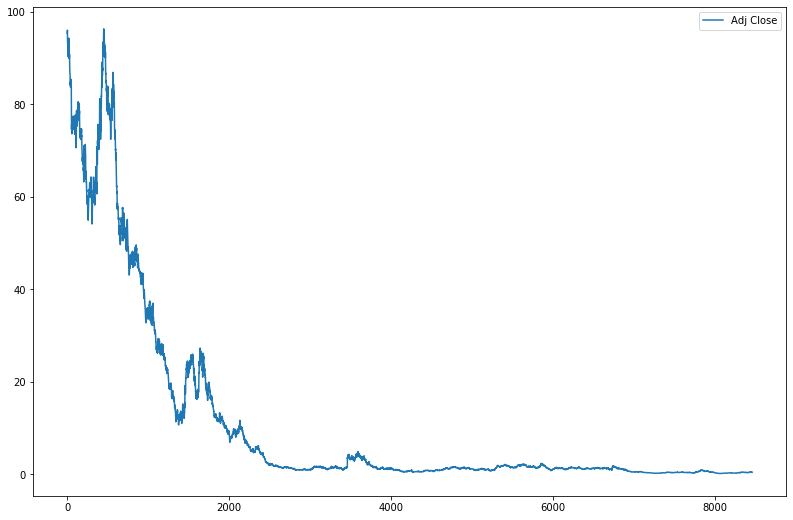

In [35]:
apple[['Adj Close']].plot(figsize = (13.5, 9))
plt.show()